# Kepler, Interstellar Home

In the recent years we have seen lots of natural catastrophic events that are the signs of Mother Nature saying that we have failed her. The events include but are not limited to global warming, the global pandemic, etc. So we may have to move in to another planet if necessary but where? Well, NASA does a fantastic job in examining exoplanets and classifying them as habitable or inhabitable. So, the goal of this project will be to use these data from NASA Exoplanet Archive and train a classifying and regression model to predict the characterisics of planets in another dataset namely, Kepler Objects of Interest dataset. The reason I am chossing this dataset is because the planets here are not classified into their catagories in the data and does not have the Earth Similarity Index (ESI).

## Importing Libraries (Basic)

To start with the project, at first we need to analyze the data and for that we need the Pandas Library

In [1]:
import pandas as pd

## Downloading the training dataset

Now we have to download the dataset that will be used for training our machine learning models.

In [2]:
url_train = 'http://www.hpcf.upr.edu/~abel/phl/hec2/database/phl_exoplanet_catalog.csv'

In [3]:
df_train = pd.read_csv(url_train)
df_train.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


## Cleaning the training dataset

As we can see, there are nearly 120 columns. Among these, we would only need some of the columns that would make our models accurate since some attributes are inaccurate.

In [4]:
df_train = df_train.drop(["P_STATUS","P_MASS_ERROR_MIN","P_MASS_ERROR_MAX","P_RADIUS_ERROR_MIN","P_RADIUS_ERROR_MAX",
               "P_YEAR","P_UPDATED","P_PERIOD_ERROR_MIN","P_PERIOD_ERROR_MAX","P_SEMI_MAJOR_AXIS","P_SEMI_MAJOR_AXIS_ERROR_MIN",
               "P_SEMI_MAJOR_AXIS_ERROR_MAX","P_ECCENTRICITY","P_ECCENTRICITY_ERROR_MIN","P_ECCENTRICITY_ERROR_MAX","P_INCLINATION",
               "P_INCLINATION_ERROR_MIN","P_INCLINATION_ERROR_MAX","P_OMEGA","P_OMEGA_ERROR_MIN","P_OMEGA_ERROR_MAX",
               "P_TPERI","P_TPERI_ERROR_MIN","P_TPERI_ERROR_MAX","P_ANGULAR_DISTANCE","P_IMPACT_PARAMETER_ERROR_MIN",
               "P_IMPACT_PARAMETER_ERROR_MAX","P_TEMP_MEASURED","P_GEO_ALBEDO","P_GEO_ALBEDO_ERROR_MIN","P_GEO_ALBEDO_ERROR_MAX","P_DETECTION",
               "P_DETECTION_MASS","P_DETECTION_RADIUS","P_ALT_NAMES","P_ATMOSPHERE","S_NAME","S_MAG","S_DISTANCE",
               "S_DISTANCE_ERROR_MIN","S_DISTANCE_ERROR_MAX","S_METALLICITY","S_METALLICITY_ERROR_MIN","S_METALLICITY_ERROR_MAX",
               "S_MASS","S_MASS_ERROR_MIN","S_MASS_ERROR_MAX","S_RADIUS_EST","S_RADIUS_ERROR_MIN","S_RADIUS_ERROR_MAX","S_TYPE","S_AGE",
               "S_AGE_ERROR_MIN","S_AGE_ERROR_MAX","S_TEMPERATURE_ERROR_MIN","S_TEMPERATURE_ERROR_MAX","S_DISC",
               "S_MAGNETIC_FIELD","S_ALT_NAMES","P_ESCAPE","P_POTENTIAL","P_GRAVITY","P_DENSITY","P_HILL_SPHERE","P_DISTANCE",
               "P_PERIASTRON","P_APASTRON","P_DISTANCE_EFF","P_FLUX_MIN","P_FLUX_MAX","P_TEMP_EQUIL_MIN","P_TEMP_EQUIL_MAX",
               "S_TYPE_TEMP","S_RA_H","S_RA_T","S_DEC_T","S_LUMINOSITY","S_HZ_OPT_MIN","S_HZ_OPT_MAX","S_HZ_CON_MIN","S_HZ_CON_MAX",
               "S_HZ_CON0_MIN","S_HZ_CON0_MAX","S_HZ_CON1_MIN","S_HZ_CON1_MAX","S_SNOW_LINE","S_ABIO_ZONE","S_TIDAL_LOCK",
               "P_TYPE_TEMP","S_CONSTELLATION","S_CONSTELLATION_ABR","S_CONSTELLATION_ENG","P_RADIUS_EST","P_MASS_EST","P_SEMI_MAJOR_AXIS_EST","P_MASS"], axis = 1)

In [5]:
df_train.head()

,P_NAME,P_RADIUS,P_PERIOD,P_IMPACT_PARAMETER,S_RA,S_DEC,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_FLUX,P_TEMP_EQUIL,P_TYPE,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
0,11 Com b,NaN,326.03000,NaN,185.17928,17.792868,19.00,4742.0,2.31,101.011410,799.44963,Jovian,0,0,0,0.083813
1,11 UMi b,NaN,516.21997,NaN,229.27454,71.823898,29.79,4213.0,1.93,107.351180,819.07569,Jovian,0,0,0,0.082414
2,14 And b,NaN,185.84000,NaN,352.82257,39.236198,11.00,4813.0,2.63,84.446427,772.30746,Jovian,0,0,0,0.081917
3,14 Her b,NaN,1773.40000,NaN,242.60130,43.817646,0.93,5338.0,4.45,0.078887,131.38424,Jovian,0,0,0,0.145241
4,16 Cyg B b,NaN,798.50000,NaN,295.46655,50.517525,1.13,5750.0,4.36,0.618972,202.22783,Jovian,1,1,0,0.368627


Now that we have narrowed down our attributes to be used, we need to clarify that the clumns provide the best accurate results. So we would have to drop the rows with no values, labeled NaN.

In [6]:
df_train.dropna(subset = ["P_RADIUS"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_PERIOD"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_FLUX"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_TEMP_EQUIL"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_TYPE"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_ESI"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_IMPACT_PARAMETER"], axis = 0, inplace = True)
df_train.dropna(subset = ["S_RA"], axis = 0, inplace = True)
df_train.dropna(subset = ["S_DEC"], axis = 0, inplace = True)
df_train.dropna(subset = ["S_RADIUS"], axis = 0, inplace = True)
df_train.dropna(subset = ["S_TEMPERATURE"], axis = 0, inplace = True)
df_train.dropna(subset = ["S_LOG_G"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_HABZONE_OPT"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_HABZONE_CON"], axis = 0, inplace = True)
df_train.dropna(subset = ["P_HABITABLE"], axis = 0, inplace = True)

In [7]:
df_train = df_train.reset_index(drop = True)

In [8]:
df_train.head()

,P_NAME,P_RADIUS,P_PERIOD,P_IMPACT_PARAMETER,S_RA,S_DEC,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_FLUX,P_TEMP_EQUIL,P_TYPE,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
0,55 Cnc e,1.90570,0.736539,0.410,133.14922,28.330818,0.94,5196.0,4.45,2420.618400,1787.00800,Superterran,0,0,0,0.259897
1,CoRoT-10 b,10.87370,13.240600,0.850,291.06371,0.746143,0.79,5075.0,4.65,39.299539,600.56763,Jovian,0,0,0,0.107056
2,CoRoT-11 b,16.03030,2.994330,0.818,280.68726,5.937688,1.37,6440.0,4.22,1521.599200,1591.18240,Jovian,0,0,0,0.057585
3,CoRoT-12 b,16.14240,2.828042,0.573,100.76568,-1.296439,1.12,5675.0,4.38,724.548370,1320.57150,Jovian,0,0,0,0.057990
4,CoRoT-13 b,9.92085,4.035190,0.374,102.72114,-5.086445,1.01,5945.0,4.46,438.933250,1166.12350,Jovian,0,0,0,0.089452


(1304, 16)

## Downloading the target dataset

At this point, the target dataset, Kepler Object of Interest is to be downloaded.

In [9]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_381564fd3b2c43f3b2a1eb29b1620013 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MCl0WdjkrHTMVQpBHDO7nCQE6XozfMPT5ai493Zb3KYy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_381564fd3b2c43f3b2a1eb29b1620013.get_object(Bucket='courseracapstone-donotdelete-pr-a9rw9vepgept5t',Key='cumulative_2020.07.29_00.45.58.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_target = pd.read_excel(body)
df_target.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509


## Cleaning the target dataset

Similarly, we will be cleaning this data as well.

In [10]:
df_target = df_target.drop(["kepid","kepoi_name","koi_disposition","koi_pdisposition","koi_score","koi_fpflag_nt","koi_fpflag_ss",
                              "koi_fpflag_co","koi_fpflag_ec","koi_time0bk","koi_duration","koi_depth","koi_model_snr",
                              "koi_tce_delivname","koi_kepmag","koi_tce_plnt_num"], axis = 1)

df_target.dropna(subset = ["kepler_name"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_period"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_prad"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_teq"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_insol"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_steff"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_srad"], axis = 0, inplace = True)
df_target.dropna(subset = ["koi_slogg"], axis = 0, inplace = True)
df_target.dropna(subset = ["ra"], axis = 0, inplace = True)
df_target.dropna(subset = ["dec"], axis = 0, inplace = True)

df_target = df_target.reset_index(drop = True)
df_target.head()

,kepler_name,koi_period,koi_impact,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,ra,dec
0,Kepler-227 b,9.488036,0.146,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,Kepler-227 c,54.418383,0.586,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,Kepler-664 b,2.525592,0.701,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200
3,Kepler-228 d,11.094321,0.538,3.90,835.0,114.81,6046.0,4.486,0.972,296.28613,48.224670
4,Kepler-228 c,4.134435,0.762,2.77,1160.0,427.65,6046.0,4.486,0.972,296.28613,48.224670


## Data Analysis

### Let's have a look at the training data

In [11]:
df_train.describe(include = "all")

,P_NAME,P_RADIUS,P_PERIOD,P_IMPACT_PARAMETER,S_RA,S_DEC,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_FLUX,P_TEMP_EQUIL,P_TYPE,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
count,1304,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304,1304.000000,1304.000000,1304.000000,1304.000000
unique,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,Kepler-90 d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Superterran,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424,NaN,NaN,NaN,NaN
mean,NaN,4.827478,24.547339,0.404866,252.978793,27.801887,1.051549,5476.594325,4.426649,442.103500,895.008933,NaN,0.016871,0.009969,0.023773,0.251195
std,NaN,5.084181,116.407005,0.263178,78.132156,28.092378,0.447932,718.232382,0.224018,1478.508034,411.592490,NaN,0.128838,0.099386,0.211458,0.130446
min,NaN,0.403560,0.179715,-0.629000,0.325750,-80.469124,0.190000,3036.000000,2.950000,0.076574,133.922030,NaN,0.000000,0.000000,0.000000,0.040601
25%,NaN,1.625450,4.147347,0.180000,246.679843,10.894617,0.780000,5100.000000,4.290000,28.276038,585.060035,NaN,0.000000,0.000000,0.000000,0.191905
50%,NaN,2.443780,8.457477,0.380000,288.651650,41.758180,0.960000,5617.000000,4.460000,104.401805,813.133315,NaN,0.000000,0.000000,0.000000,0.266415
75%,NaN,4.938005,19.279775,0.600000,294.068490,46.005222,1.240000,5953.000000,4.580000,379.385288,1123.652275,NaN,0.000000,0.000000,0.000000,0.297974


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 16 columns):
P_NAME                1304 non-null object
P_RADIUS              1304 non-null float64
P_PERIOD              1304 non-null float64
P_IMPACT_PARAMETER    1304 non-null float64
S_RA                  1304 non-null float64
S_DEC                 1304 non-null float64
S_RADIUS              1304 non-null float64
S_TEMPERATURE         1304 non-null float64
S_LOG_G               1304 non-null float64
P_FLUX                1304 non-null float64
P_TEMP_EQUIL          1304 non-null float64
P_TYPE                1304 non-null object
P_HABZONE_OPT         1304 non-null int64
P_HABZONE_CON         1304 non-null int64
P_HABITABLE           1304 non-null int64
P_ESI                 1304 non-null float64
dtypes: float64(11), int64(3), object(2)
memory usage: 163.1+ KB


In [13]:
df_train.corr()

,P_RADIUS,P_PERIOD,P_IMPACT_PARAMETER,S_RA,S_DEC,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_FLUX,P_TEMP_EQUIL,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
P_RADIUS,1.000000,0.017699,0.143642,-0.342857,-0.469432,0.438722,0.338470,-0.414187,0.363742,0.553848,-0.051145,-0.056720,-0.065618,-0.731856
P_PERIOD,0.017699,1.000000,0.030628,0.028442,0.059368,0.076981,-0.021648,-0.086686,-0.053096,-0.217539,0.175872,0.152122,0.107223,0.141668
P_IMPACT_PARAMETER,0.143642,0.030628,1.000000,-0.097757,-0.136394,0.016534,-0.053840,-0.001111,-0.027195,-0.024272,-0.007380,-0.023598,-0.007900,-0.069962
S_RA,-0.342857,0.028442,-0.097757,1.000000,0.532115,-0.040317,0.047062,0.031448,-0.091034,-0.210560,0.034905,0.025146,0.019567,0.272178
S_DEC,-0.469432,0.059368,-0.136394,0.532115,1.000000,-0.078389,0.003326,0.072159,-0.137198,-0.313366,0.068989,0.055078,0.054174,0.404762
S_RADIUS,0.438722,0.076981,0.016534,-0.040317,-0.078389,1.000000,0.589919,-0.950638,0.303593,0.522113,-0.103649,-0.088095,-0.109206,-0.471051
S_TEMPERATURE,0.338470,-0.021648,-0.053840,0.047062,0.003326,0.589919,1.000000,-0.654580,0.376472,0.538114,-0.146881,-0.126853,-0.166060,-0.481111
S_LOG_G,-0.414187,-0.086686,-0.001111,0.031448,0.072159,-0.950638,-0.654580,1.000000,-0.253415,-0.528211,0.121352,0.103879,0.130321,0.495432
P_FLUX,0.363742,-0.053096,-0.027195,-0.091034,-0.137198,0.303593,0.376472,-0.253415,1.000000,0.603712,-0.039095,-0.029969,-0.033569,-0.264017
P_TEMP_EQUIL,0.553848,-0.217539,-0.024272,-0.210560,-0.313366,0.522113,0.538114,-0.528211,0.603712,1.000000,-0.205458,-0.162186,-0.176994,-0.656351


From the above analysis, we can understand that there are in total 5 distinct planet types and most of them Superterran in numbers of 424. Besides our correlation function shows us that the ESI is mostly related to the radius and temperature of both planets and stars they are orbiting around. We also see positive correlation but we cannot use those since the negative correlations have higher magnitudes. 

## Visualization of train dataset

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### Number of Planets VS Planet Types

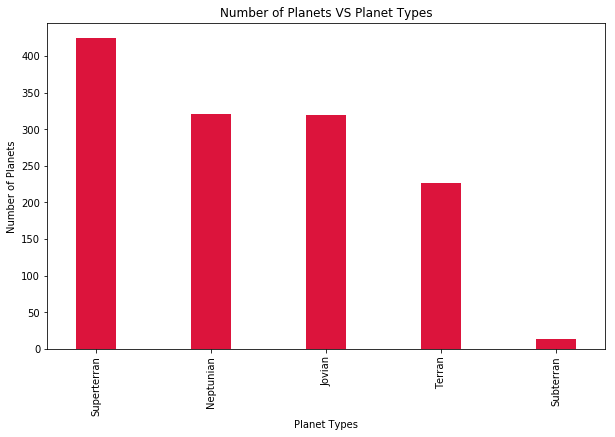

In [15]:
df_train["P_TYPE"].value_counts().plot(kind = "bar", figsize = (10, 6), width = 0.35, color = "crimson")
plt.title("Number of Planets VS Planet Types")
plt.ylabel("Number of Planets")
plt.xlabel("Planet Types")
plt.show()

### Number of planets VS Habitable Zones

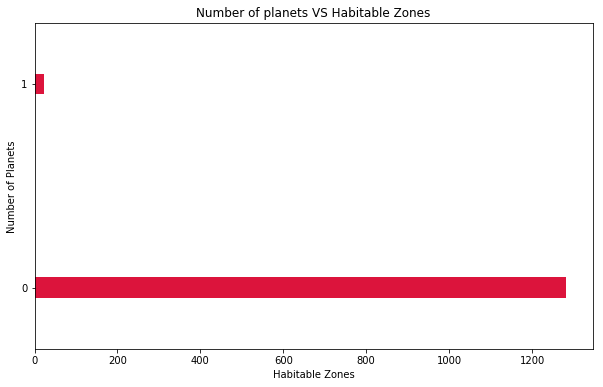

In [16]:
df_train["P_HABZONE_OPT"].value_counts().plot(kind = "barh", figsize = (10, 6), width = 0.1, color = "crimson")
plt.title("Number of planets VS Habitable Zones")
plt.ylabel("Number of Planets")
plt.xlabel("Habitable Zones")
plt.show()

### Number of planets VS Habitable Zones

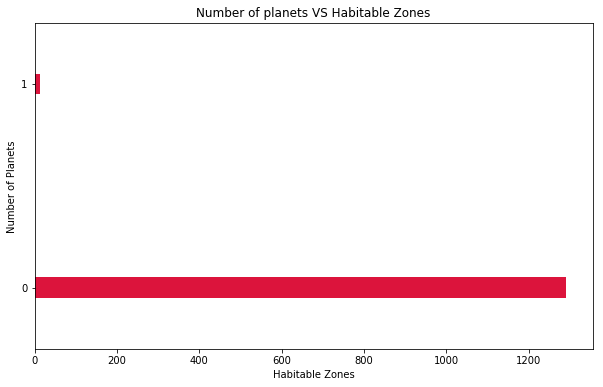

In [17]:
df_train["P_HABZONE_CON"].value_counts().plot(kind = "barh", figsize = (10, 6), width = 0.1, color = "crimson")
plt.title("Number of planets VS Habitable Zones")
plt.ylabel("Number of Planets")
plt.xlabel("Habitable Zones")
plt.show()

### Number of planets VS Habitable Indices

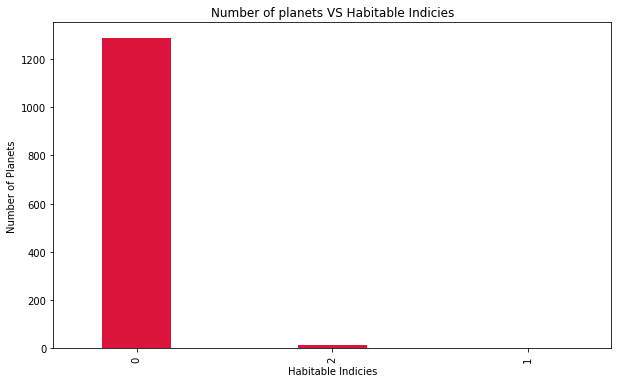

In [18]:
df_train["P_HABITABLE"].value_counts().plot(kind = "bar", figsize = (10,6), width = 0.35, color = "crimson")
plt.title("Number of planets VS Habitable Indicies")
plt.ylabel("Number of Planets")
plt.xlabel("Habitable Indicies")
plt.show()

## Pre-processing the Daa

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np

Now we split the datasets into training and test datasets. We will also be separating the independent and dependent attributes

In [45]:
X = df_train[["P_RADIUS","P_PERIOD","P_IMPACT_PARAMETER","S_RA","S_DEC","S_RADIUS","S_TEMPERATURE","S_LOG_G","P_FLUX","P_TEMP_EQUIL"]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
PR = df_train[["P_TEMP_EQUIL", "P_RADIUS"]].values
Y_TYPE = df_train[["P_TYPE"]].values.ravel()
Y_HAB_OPT = df_train[["P_HABZONE_OPT"]].values.ravel()
Y_HAB_CON = df_train[["P_HABZONE_CON"]].values.ravel()
Y_HAB_INDEX = df_train[["P_HABITABLE"]].values.ravel()
ESI = df_train["P_ESI"].values.ravel()

X_train, X_test, PR_train, PR_test, y_train_type, y_test_type, y_train_opt, y_test_opt, y_train_con, y_test_con, y_train_index, y_test_index, ESI_train, ESI_test = train_test_split(X, PR, Y_TYPE, Y_HAB_OPT, Y_HAB_CON, Y_HAB_INDEX, ESI, test_size = 0.2, random_state = 4)

## Modeling

Now is the main part of the project, we will be trianig training different models with our training datasets. Here we are using different types of models for the best accuracy.

### K Nearest Classifier

In [46]:
neigh_type = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train_type)
yhat_type = neigh_type.predict(X_test)
print("The accuracy of KNN for classifying types of train set is: ", metrics.accuracy_score(y_train_type, neigh_type.predict(X_train)))
print("The accuracy of KNN for classifying types of test set is: ", metrics.accuracy_score(y_test_type, yhat_type))

print("")

neigh_opt = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train_opt)
yhat_opt = neigh_opt.predict(X_test)
print("The accuracy of KNN for classifying habitable optimistic type of train set is: ", metrics.accuracy_score(y_train_opt, neigh_opt.predict(X_train)))
print("The accuracy of KNN for classifying habitable optimistic type of test set is: ", metrics.accuracy_score(y_test_opt, yhat_opt))

print("")

neigh_con = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train_con)
yhat_con = neigh_con.predict(X_test)
print("The accuracy of KNN for classifying habitable conservative type of train set is: ", metrics.accuracy_score(y_train_con, neigh_con.predict(X_train)))
print("The accuracy of KNN for classifying habitable conservative type of test set is: ", metrics.accuracy_score(y_test_con, yhat_con))

print("")

neigh_index = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train_index)
yhat_index = neigh_index.predict(X_test)
print("The accuracy of KNN for classifying habitable index of train set is: ", metrics.accuracy_score(y_train_index, neigh_index.predict(X_train)))
print("The accuracy of KNN for classifying habitable index of test set is: ", metrics.accuracy_score(y_test_index, yhat_index))

The accuracy of KNN for classifying types of train set is:  0.7488015340364333
The accuracy of KNN for classifying types of test set is:  0.5900383141762452

The accuracy of KNN for classifying habitable optimistic type of train set is:  0.9894534995206136
The accuracy of KNN for classifying habitable optimistic type of test set is:  0.9885057471264368

The accuracy of KNN for classifying habitable conservative type of train set is:  0.9923298178331735
The accuracy of KNN for classifying habitable conservative type of test set is:  0.9885057471264368

The accuracy of KNN for classifying habitable index of train set is:  0.9904122722914669
The accuracy of KNN for classifying habitable index of test set is:  0.9885057471264368


### Decision Tree Classifier

In [47]:
tree_type = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train_type)
yhat_d_type = tree_type.predict(X_test)
print("The accuracy of Decision Tree for classifying types of train set is: ", metrics.accuracy_score(y_train_type, tree_type.predict(X_train)))
print("The accuracy of Decision Tree for classifying types of test set is: ", metrics.accuracy_score(y_test_type, yhat_d_type))

print("")

tree_opt = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train_opt)
yhat_d_opt = tree_opt.predict(X_test)
print("The accuracy of Decision Tree for classifying habitable optimistic type of train set is: ", metrics.accuracy_score(y_train_opt, tree_opt.predict(X_train)))
print("The accuracy of Decision Tree for classifying habitable optimistic type of test set is: ", metrics.accuracy_score(y_test_opt, yhat_d_opt))

print("")

tree_con = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train_con)
yhat_d_con = tree_con.predict(X_test)
print("The accuracy of Decision Tree for classifying habitable conservative type of train set is: ", metrics.accuracy_score(y_train_con, tree_con.predict(X_train)))
print("The accuracy of Decision Tree for classifying habitable conservative type of test set is: ", metrics.accuracy_score(y_test_con, yhat_d_con))

print("")

tree_index = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train_index)
yhat_d_index = tree_index.predict(X_test)
print("The accuracy of Decision Tree for classifying habitable index of train set is: ", metrics.accuracy_score(y_train_index, tree_index.predict(X_train)))
print("The accuracy of Decision Tree for classifying habitable index of test set is: ", metrics.accuracy_score(y_test_index, yhat_d_index))

The accuracy of Decision Tree for classifying types of train set is:  1.0
The accuracy of Decision Tree for classifying types of test set is:  0.9693486590038314

The accuracy of Decision Tree for classifying habitable optimistic type of train set is:  1.0
The accuracy of Decision Tree for classifying habitable optimistic type of test set is:  0.9961685823754789

The accuracy of Decision Tree for classifying habitable conservative type of train set is:  1.0
The accuracy of Decision Tree for classifying habitable conservative type of test set is:  0.9961685823754789

The accuracy of Decision Tree for classifying habitable index of train set is:  1.0
The accuracy of Decision Tree for classifying habitable index of test set is:  0.9961685823754789


### Logistic Regression

In [48]:
LR_type = LogisticRegression(C = 0.01, solver = 'newton-cg', multi_class = 'ovr').fit(X_train, y_train_type)
yhat_ll_type = LR_type.predict(X_test)
print("The accuracy of Logistic Regression for classifying types of train set is: ", metrics.accuracy_score(y_train_type, LR_type.predict(X_train)))
print("The accuracy of Logistic Regression for classifying types of test set is: ", metrics.accuracy_score(y_test_type, yhat_ll_type))

print("")

LR_opt = LogisticRegression(C = 0.01, solver = 'newton-cg', multi_class = 'ovr').fit(X_train, y_train_opt)
yhat_ll_opt = LR_opt.predict(X_test)
print("The accuracy of Logistic Regression for classifying habitable optimistic type of train set is: ", metrics.accuracy_score(y_train_opt, LR_opt.predict(X_train)))
print("The accuracy of Logistic Regression for classifying habitable optimistic type of test set is: ", metrics.accuracy_score(y_test_opt, yhat_ll_opt))

print("")

LR_con = LogisticRegression(C = 0.01, solver = 'newton-cg', multi_class = 'ovr').fit(X_train, y_train_con)
yhat_ll_con = LR_con.predict(X_test)
print("The accuracy of Logistic Regression for classifying habitable conservative type of train set is: ", metrics.accuracy_score(y_train_con, LR_con.predict(X_train)))
print("The accuracy of Logistic Regression for classifying habitable conservative type of test set is: ", metrics.accuracy_score(y_test_con, yhat_ll_con))

print("")

LR_index = LogisticRegression(C = 0.01, solver = 'newton-cg', multi_class = 'ovr').fit(X_train, y_train_index)
yhat_ll_index = LR_index.predict(X_test)
print("The accuracy of Logistic Regression for classifying habitable index of train set is: ", metrics.accuracy_score(y_train_index, LR_index.predict(X_train)))
print("The accuracy of Logistic Regression for classifying habitable index of test set is: ", metrics.accuracy_score(y_test_index, yhat_ll_index))

The accuracy of Logistic Regression for classifying types of train set is:  0.5906040268456376
The accuracy of Logistic Regression for classifying types of test set is:  0.5900383141762452

The accuracy of Logistic Regression for classifying habitable optimistic type of train set is:  0.9827420901246404
The accuracy of Logistic Regression for classifying habitable optimistic type of test set is:  0.9846743295019157

The accuracy of Logistic Regression for classifying habitable conservative type of train set is:  0.9904122722914669
The accuracy of Logistic Regression for classifying habitable conservative type of test set is:  0.9885057471264368

The accuracy of Logistic Regression for classifying habitable index of train set is:  0.9865771812080537
The accuracy of Logistic Regression for classifying habitable index of test set is:  0.9885057471264368


### Support Vector Machine

In [49]:
svm_type = svm.SVC(kernel='rbf', gamma = 'auto').fit(X_train, y_train_type)
yhat_s_type = svm_type.predict(X_test)
print("The accuracy of Support Vector Machine for classifying types of train set is: ", metrics.accuracy_score(y_train_type, svm_type.predict(X_train)))
print("The accuracy of Support Vector Machine for classifying types of test set is: ", metrics.accuracy_score(y_test_type, yhat_s_type))

print("")

svm_opt = svm.SVC(kernel='rbf', gamma = 'auto').fit(X_train, y_train_opt)
yhat_s_opt = svm_opt.predict(X_test)
print("The accuracy of Support Vector Machine for classifying habitable optimistic type of train set is: ", metrics.accuracy_score(y_train_opt, svm_opt.predict(X_train)))
print("The accuracy of Support Vector Machine for classifying habitable optimistic type of test set is: ", metrics.accuracy_score(y_test_opt, yhat_s_opt))

print("")

svm_con = svm.SVC(kernel='rbf', gamma = 'auto').fit(X_train, y_train_con)
yhat_s_con = svm_con.predict(X_test)
print("The accuracy of Support Vector Machine for classifying habitable conservative type of train set is: ", metrics.accuracy_score(y_train_con, svm_con.predict(X_train)))
print("The accuracy of Support Vector Machine for classifying habitable conservative type of test set is: ", metrics.accuracy_score(y_test_con, yhat_s_con))

print("")

svm_index = svm.SVC(kernel='rbf', gamma = 'auto').fit(X_train, y_train_index)
yhat_s_index = svm_index.predict(X_test)
print("The accuracy of Support Vector Machine for classifying habitable index of train set is: ", metrics.accuracy_score(y_train_index, svm_index.predict(X_train)))
print("The accuracy of Support Vector Machine for classifying habitable index of test set is: ", metrics.accuracy_score(y_test_index, yhat_s_index))

The accuracy of Support Vector Machine for classifying types of train set is:  0.7420901246404602
The accuracy of Support Vector Machine for classifying types of test set is:  0.7049808429118773

The accuracy of Support Vector Machine for classifying habitable optimistic type of train set is:  0.9856184084372004
The accuracy of Support Vector Machine for classifying habitable optimistic type of test set is:  0.9846743295019157

The accuracy of Support Vector Machine for classifying habitable conservative type of train set is:  0.9913710450623202
The accuracy of Support Vector Machine for classifying habitable conservative type of test set is:  0.9885057471264368

The accuracy of Support Vector Machine for classifying habitable index of train set is:  0.9865771812080537
The accuracy of Support Vector Machine for classifying habitable index of test set is:  0.9885057471264368


From the above programs run, we can simplyb see that the best classifier would be the Decision Tree Clasiifier.

### Regression

Now we determine the ESI using regression

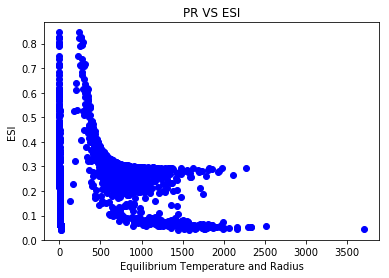

<Figure size 1440x864 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("PR VS ESI")
plt.ylabel("ESI")
plt.xlabel("Equilibrium Temperature and Radius")
plt.plot(PR_train, ESI_train, 'bo')
plt.figure(figsize=(20, 12))
plt.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
ESI_model = RandomForestRegressor().fit(PR_train, ESI_train)
yhat_esi = ESI_model.predict(PR_test)
print("The accuracy of Random Forest Regressor for determining Earth Similarity Index of train set is: ", metrics.explained_variance_score(ESI_train, ESI_model.predict(PR_train)))
print("The accuracy of Random Forest Regressor for determining Earth Similarity Index of test set is: ", metrics.explained_variance_score(ESI_test, yhat_esi))

The accuracy of Random Forest Regressor for determining Earth Similarity Index of train set is:  0.9985708481016701
The accuracy of Random Forest Regressor for determining Earth Similarity Index of test set is:  0.9887629296337064


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy also seems almost perfect and that's what we needed.

## Final Classification and Determination

At first lets arrange the independent columns for matching the order in the independent columns of the training datasets

In [52]:
target_attributes = df_target[["koi_prad", "koi_period", "koi_impact", "ra", "dec", "koi_srad", "koi_steff", "koi_slogg", "koi_insol", "koi_teq"]].values
target_attributes = preprocessing.StandardScaler().fit(target_attributes).transform(target_attributes.astype(float))
target_esi_attributes = df_target[["koi_teq", "koi_prad"]].values

### Classifying Planet Types

In [53]:
planet_type = tree_type.predict(target_attributes)
planet_type[0:10]

array(['Neptunian', 'Neptunian', 'Neptunian', 'Jovian', 'Neptunian',
       'Neptunian', 'Jovian', 'Jovian', 'Jovian', 'Jovian'], dtype=object)

### Classifying Optimistic Habitable Zone

In [54]:
planet_hab_opt = tree_opt.predict(target_attributes)
planet_hab_opt[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Classifying Conservative Habitable Zone

In [55]:
planet_hab_con = tree_con.predict(target_attributes)
planet_hab_con[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Classifying Habitable Index

In [56]:
planet_hab_index = tree_index.predict(target_attributes)
planet_hab_index[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Determining ESI

In [57]:
planet_esi = ESI_model.predict(target_esi_attributes)
planet_esi[0:10]

array([0.25677349, 0.33950019, 0.22491466, 0.18946606, 0.2245388 ,
       0.27659886, 0.15735298, 0.07015883, 0.05743698, 0.06294662])

## Creating the new dataframe

In [58]:
dataframe = pd.DataFrame({"Kepler Planet": df_target["kepler_name"], "Planet Type": planet_type, "Hab Zone Opt": planet_hab_opt, "Hab Zone Con": planet_hab_con, "Habitable Index": planet_hab_index, "ESI": planet_esi})
dataframe.head()

,Kepler Planet,Planet Type,Hab Zone Opt,Hab Zone Con,Habitable Index,ESI
0,Kepler-227 b,Neptunian,0,0,0,0.256773
1,Kepler-227 c,Neptunian,0,0,0,0.339500
2,Kepler-664 b,Neptunian,0,0,0,0.224915
3,Kepler-228 d,Jovian,0,0,0,0.189466
4,Kepler-228 c,Neptunian,0,0,0,0.224539


## Best ESI

Here let's arrange the dataframe so that it shows the planets' data with the best Earth Similarities Indicies

In [59]:
dataframe.sort_values(by = ["ESI"], ascending = False, inplace = True)
dataframe = dataframe.reset_index(drop = True)
dataframe.head()

,Kepler Planet,Planet Type,Hab Zone Opt,Hab Zone Con,Habitable Index,ESI
0,Kepler-1410 b,Neptunian,1,0,0,0.837641
1,Kepler-442 b,Superterran,1,1,2,0.837641
2,Kepler-1652 b,Neptunian,1,1,0,0.828864
3,Kepler-296 A e,Superterran,1,0,2,0.824565
4,Kepler-560 B b,Neptunian,1,0,0,0.823855


## Tree Diagrams

Now let's look at how the Decision Tree Classifier decided to classify the planet types, habitable zones and habitable indicies

In [35]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

### Tree Diagram for Planet Type

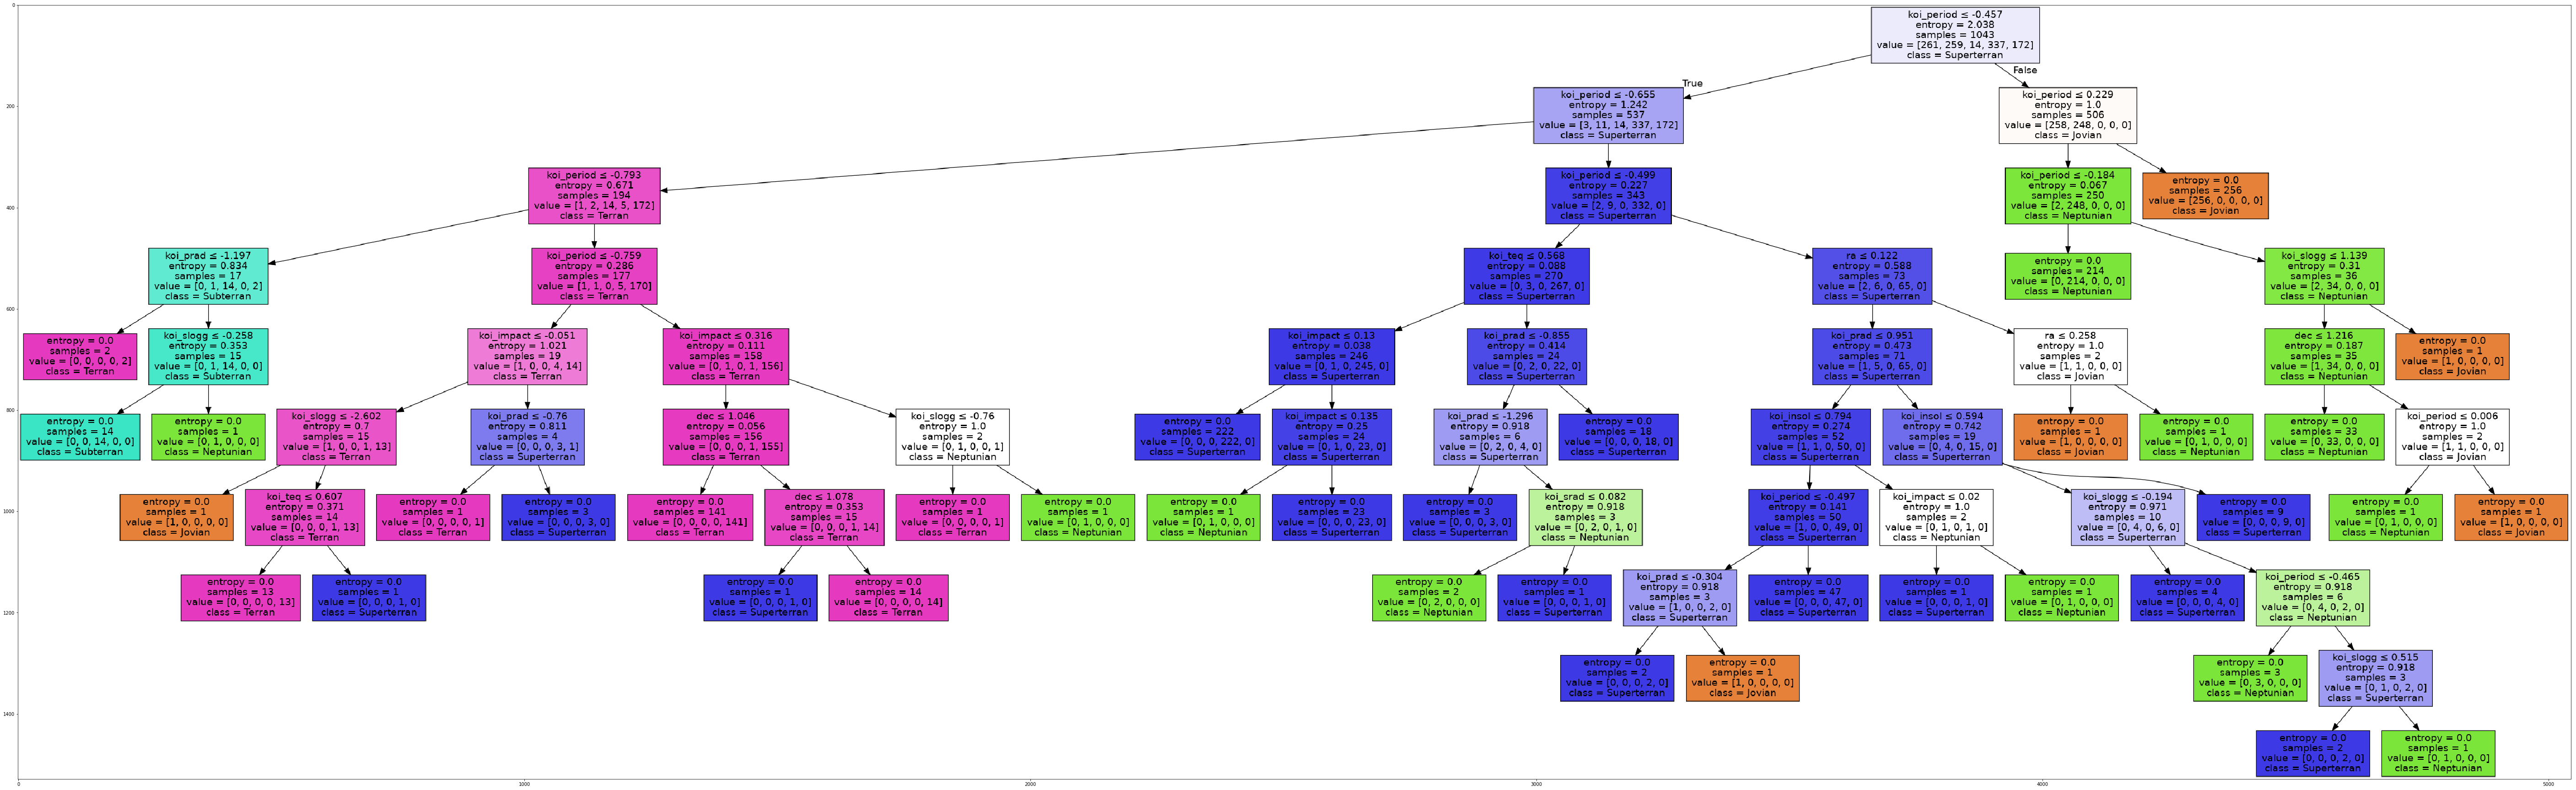

In [60]:
dot_data = StringIO()
filename = "typetree.png"
featureNames = df_target.columns[1:11]
targetNames = dataframe["Planet Type"].unique().tolist()
out=tree.export_graphviz(tree_type,feature_names=featureNames, class_names= np.unique(y_train_type), out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Tree Diagram for Optimistic Habitable Zone

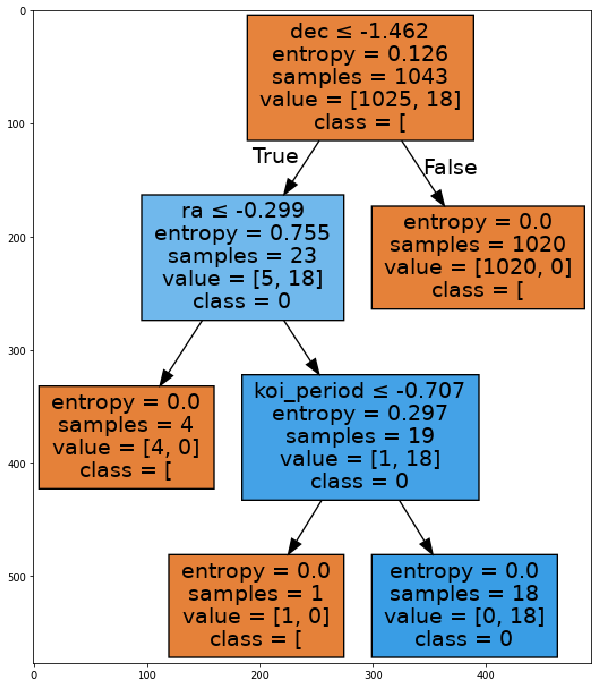

In [61]:
dot_data = StringIO()
filename = "opt_tree.png"
featureNames = df_target.columns[1:11]
targetNames = dataframe["Hab Zone Opt"].unique().tolist()
out=tree.export_graphviz(tree_opt,feature_names=featureNames, class_names= str(np.unique(y_train_opt)), out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

### Tree Diagram for Conservative Habitable Zone

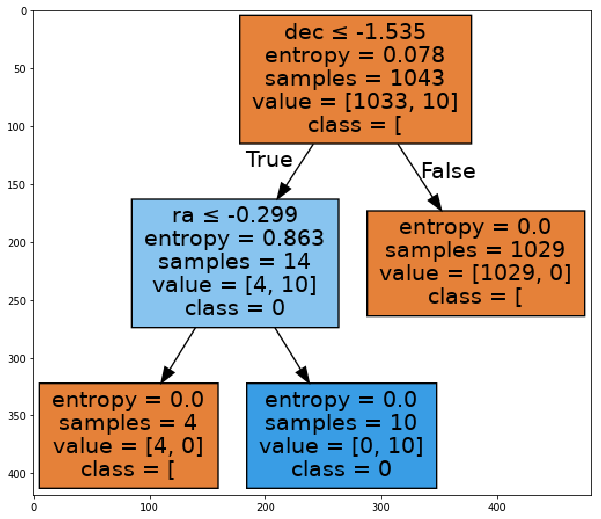

In [62]:
dot_data = StringIO()
filename = "con_tree.png"
featureNames = df_target.columns[1:11]
targetNames = dataframe["Hab Zone Con"].unique().tolist()
out=tree.export_graphviz(tree_con,feature_names=featureNames, class_names= str(np.unique(y_train_con)), out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

### Tree Diagram for Habitable Index

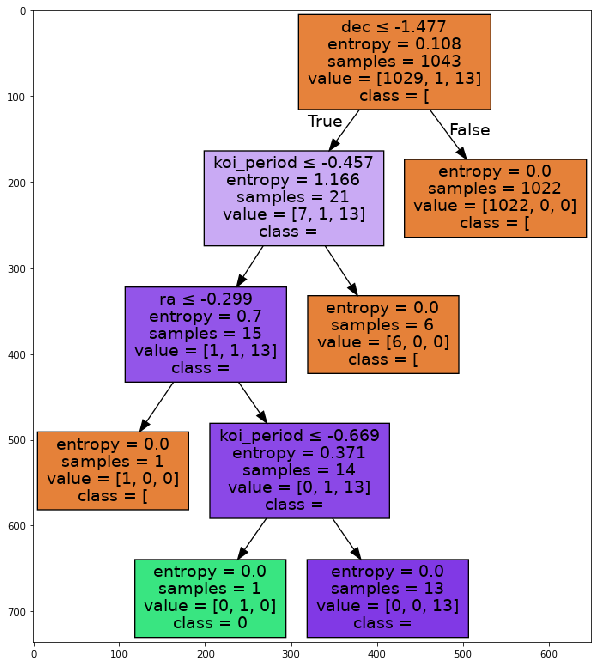

In [63]:
dot_data = StringIO()
filename = "index_tree.png"
featureNames = df_target.columns[1:11]
targetNames = dataframe["Habitable Index"].unique().tolist()
out=tree.export_graphviz(tree_index,feature_names=featureNames, class_names= str(np.unique(y_train_index)), out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

## Data Visualization of Predicted Dataframe

### Number of Planets VS Planet Types

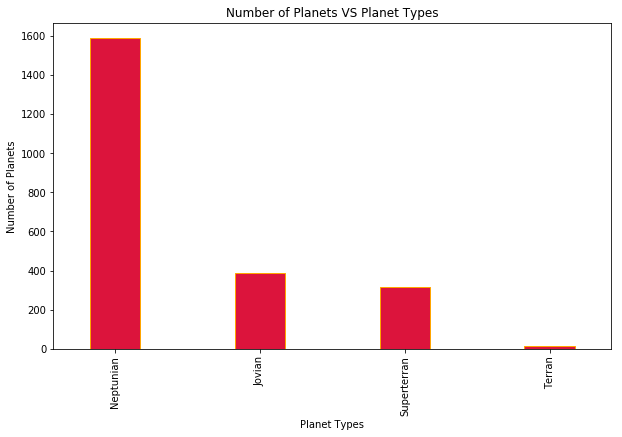

In [64]:
dataframe["Planet Type"].value_counts().plot(kind = "bar", figsize = (10, 6), width = 0.35, color = "crimson", edgecolor = "orange")
plt.title("Number of Planets VS Planet Types")
plt.ylabel("Number of Planets")
plt.xlabel("Planet Types")
plt.show()

### Number of Planets VS Optimistic Habitable Zones

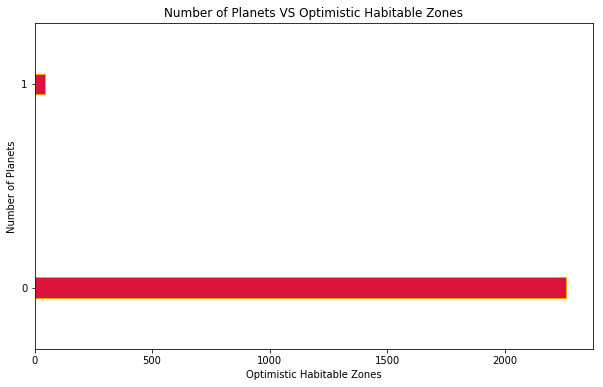

In [65]:
dataframe["Hab Zone Opt"].value_counts().plot(kind = "barh", figsize = (10, 6), width = 0.1, color = "crimson", edgecolor = "orange")
plt.title("Number of Planets VS Optimistic Habitable Zones")
plt.ylabel("Number of Planets")
plt.xlabel("Optimistic Habitable Zones")
plt.show()

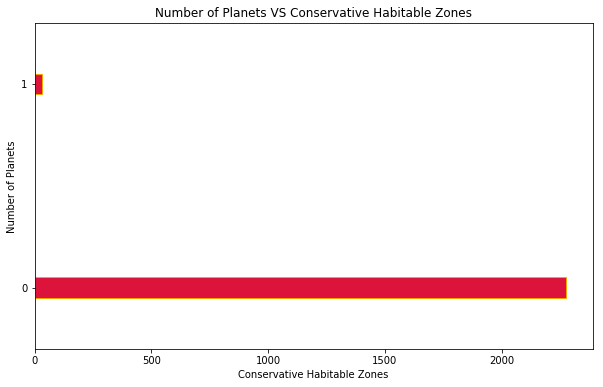

In [66]:
dataframe["Hab Zone Con"].value_counts().plot(kind = "barh", figsize = (10, 6), width = 0.1, color = "crimson", edgecolor = "orange")
plt.title("Number of Planets VS Conservative Habitable Zones")
plt.ylabel("Number of Planets")
plt.xlabel("Conservative Habitable Zones")
plt.show()

### Number of Planets VS Habitable Indices

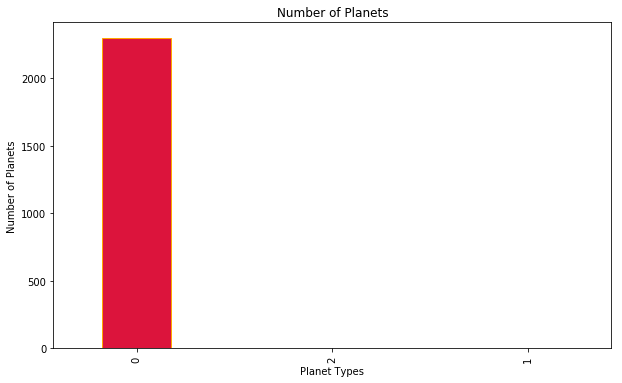

In [67]:
dataframe["Habitable Index"].value_counts().plot(kind = "bar", figsize = (10,6), width = 0.35, color = "crimson", edgecolor = "orange")
plt.title("Number of Planets")
plt.ylabel("Number of Planets")
plt.xlabel("Planet Types")
plt.show()

In [69]:
dataframe

,Kepler Planet,Planet Type,Hab Zone Opt,Hab Zone Con,Habitable Index,ESI
0,Kepler-1410 b,Neptunian,1,0,0,0.837641
1,Kepler-442 b,Superterran,1,1,2,0.837641
2,Kepler-1652 b,Neptunian,1,1,0,0.828864
3,Kepler-296 A e,Superterran,1,0,2,0.824565
4,Kepler-560 B b,Neptunian,1,0,0,0.823855
5,Kepler-440 b,Neptunian,1,1,0,0.823838
6,Kepler-452 b,Superterran,1,1,2,0.819539
7,Kepler-1512 b,Superterran,0,0,0,0.793213
8,Kepler-438 b,Superterran,0,0,0,0.768862
9,Kepler-395 c,Superterran,0,0,0,0.761061


This concludes the project